##**Домашнее задание по теме "Визуализация данных и описательная статистика"**

**Задание**:

Домашнее задание вы также можете найти [по ссылке](github.com...ysis.ipynb).

Попробуем провести базовую разведку данных (EDA).

Вам предложено два датасета на выбор: “german_used_cars.csv” и “salary_dataset.csv”, которые вы сможете найти в материалах к занятию.

Информация по первому набору:

Brand: The brand or manufacturer of the car.
Model: The specific model of the car.
Color: The color of the car’s exterior.
Registration Date: The date when the car was registered (Month/Year).
Year of Production: The year in which the car was manufactured.
Price in Euro: The price of the car in Euros.
Power: The power of the car in kilowatts (kW) and horsepower (ps).
Transmission Type: The type of transmission (e.g., automatic, manual).
Fuel Type: The type of fuel the car requires.
Fuel Consumption: Information about the car’s fuel consumption in L/100km ang g/km.
Mileage: The total distance traveled by the car in km.
Offer Description: Additional description provided in the car offer.
Информация по второму набору:

Age: The age of the individuals in the dataset, representing their chronological age in years.
Gender: The gender identification of the individuals, indicating their gender or gender identity.
Education Level: The highest level of education attained by the individuals, indicating their educational qualifications or degree.
Job Title: The occupation or job title of the individuals, specifying their professional role or position.
Years of Experience: The number of years of professional experience accumulated by the individuals in their respective fields.
Salary: The income level or salary earned by the individuals, denoting their monetary compensation.
Country: The country of residence or origin of the individuals, providing geographical information.
Race: The racial background or ethnicity of the individuals, reflecting their specific racial or ethnic group.
Вы также можете использовать любые другие данные на ваш выбор, но убедитесь, что в ноутбуке оставлены аутпуты ячеек, а также указан источник, с которым вы работали.

Задание:

Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

Желательно, но не обязательно:*

Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.

Требования по оформлению графиков:
У графиков должен быть заголовок, подписи осей, легенда (опционально). Каждая визуализация должным образом оформлена и может быть интерпретирована даже в отрыве от контекста.

Важно!
Оставляйте свои комментарии к графикам: отвечает ли визуализация на поставленный вопрос, что вы наблюдаете в данных, какие выводы можно сделать и т.д. Ход ваших мыслей так же важен, как и написанный вами код.

Примечание:
Домашняя работа сдается ссылкой Google Colab. Мы не сможем проверить ее или помочь, если вы пришлете:

файлы;
архивы;
скриншоты кода.
Все обсуждения и консультации по выполнению ведутся только на соответствующем канале в Discord.

Как правильно задавать вопросы аспирантам, преподавателям и коллегам:

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

Что я делаю?
Какого результата я ожидаю?
Как фактический результат отличается от ожидаемого?
Что я уже попробовал сделать, чтобы исправить проблему?
По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

Загрузка данных


In [ ]:
df = pd.read_csv("german_used_cars.csv")

In [ ]:
# Посмотрим на размеры датафрейма
df.shape

(251079, 15)

In [ ]:
# Посмотрим первые 5 строк
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


**Решение:**

# Мы видим следующие столбцы:

Brand: Марка автомобиля

Model: Модель

Color: Цвет кузова

Registration Date: Дата поставновки на учет

Year of Production: Год производства

Price in Euro: Цена (в евро)

Power: Мощность в КилоВаттах (kW) и лошадиных силах (ps).

Transmission Type: Тип коробки передач

Fuel Type: Тип топлива

Fuel Consumption: Расход топлива - литров на 100 км. и гр. на 1 км.

Mileage: пробег (км.)

Offer Description: доп. инфо

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [ ]:
# При первом анализе данных мы видим попуски в данных по ряду столбцов.
# Также можно констатировать, что некорректно указан тип данных в некоторых столбцах.

In [ ]:
# Проверим, почему в столбцах year, price_in_euro,power_kw/power_ps, fuel_consumption_g_kmб fuel_consumption_l_100km  - тип данных object?

In [ ]:
df['year'].unique()


array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Petrol', 'Automatic',
       'Manual', 'Diesel', '04/2017', 'Electric', '12/2003', '3700',
       '05/2017', '04/2006', 'LPG', '8.000 km', '113.000 km', '32.250 km',
       '02/2020', '06/2021', '07/2021', 'Hybrid', '03/2023', '01/2019',
       '10/2010', '280.000 km', '03/2015', '10/2016', '06/2016',
       '80.000 km', '06/2018', '09/2018', '39.900 km', '18.990 km',
       '05/2023', '04/2013', '05/2015', '05/2016', '07/2018', '12/2022',
       '12/2020', '05/2021', '108.500 km', '11/2018', '33.150 km',
       '12.520 km', '15.180 km', '6.500 km', '64.500 km', '03/2019',
       '27449', '1.000 km', '01/2023', '02/2023', '06/2023', '11/2013',
       '14990', '49.000 km', '04/2023', '03/2007', '159.400 km',
       '217.946 km', '

In [ ]:
df['price_in_euro'].unique()

array(['1300', '24900', '5900', ..., '81350', '89690', '61521'],
      dtype=object)

In [ ]:
df['power_kw'].unique()

array(['148', '191', '110', '132', '141', '162', '88', '103', '152',
       '114', '106', '76', '140', '78', '77', '184', '85', '122', '123',
       '121', '177', '136', '147', '185', '129', '176', '118', '120',
       '154', '134', '70', '58', '66', '331', '125', '173', '99', '62',
       '63', '51', '57', '228', '265', '206', '100', '375', '397', '96',
       '115', '117', '10', nan, '95', '250', '244', '338', '309', '318',
       '345', '320', '343', '306', '350', '335', '336', '346', '283',
       '388', '313', '380', '298', '559', '365', '321', '366', '422',
       '421', '402', '423', '425', '381', '403', '412', '447', '420',
       '444', '443', '328', '448', '533', '405', '515', '520', '394',
       '393', '404', '470', '74', '92', '81', '220', '142', '165', '169',
       '195', '75', '55', '128', '280', '45', '235', '133', '253', '246',
       '193', '202', '130', '171', '373', '155', '188', '127',
       '7,8 l/100 km', '353', '150', '225', '257', '98', '119', '240',
       '

In [ ]:
df['power_ps'].unique()

array(['201', '260', '150', '179', '192', '220', '120', '140', '207',
       '155', '144', '103', '190', '106', '105', '250', '116', '166',
       '167', '165', '241', '185', '200', '252', '175', '239', '160',
       '163', '209', '182', '95', '79', '90', '450', '170', '235', '135',
       '84', '86', '69', '77', '310', '360', '280', '136', '510', '540',
       '131', '156', '159', '14', nan, '129', '340', '332', '460', '420',
       '432', '469', '435', '466', '416', '476', '455', '457', '470',
       '385', '528', '426', '517', '405', '760', '496', '436', '498',
       '574', '572', '547', '575', '578', '518', '548', '560', '608',
       '571', '604', '602', '446', '609', '725', '551', '700', '707',
       '536', '534', '549', '639', '101', '125', '110', '299', '193',
       '224', '230', '265', '102', '75', '174', '381', '61', '320', '181',
       '344', '334', '262', '275', '177', '232', '507', '211', '256',
       '173', '480', '204', '306', '349', '133', '162', '326', '194 g/km',

In [ ]:
df['fuel_consumption_l_100km'].unique()

array(['10,9 l/100 km', nan, '9,5 l/100 km', '7,2 l/100 km',
       '8,8 l/100 km', '13,4 l/100 km', '11 l/100 km', '9,2 l/100 km',
       '11,1 l/100 km', '11,7 l/100 km', '8,4 l/100 km', '8,2 l/100 km',
       '8,9 l/100 km', '11,4 l/100 km', '8,5 l/100 km', '8,3 l/100 km',
       '7,9 l/100 km', '8,7 l/100 km', '8,1 l/100 km', '12,2 l/100 km',
       '12 l/100 km', '5,8 l/100 km', '10 l/100 km', '6,7 l/100 km',
       '8,6 l/100 km', '12,5 l/100 km', '9,7 l/100 km', '12,1 l/100 km',
       '8 l/100 km', '7,5 l/100 km', '6,2 l/100 km', '13,2 l/100 km',
       '6 l/100 km', '12,4 l/100 km', '6,8 l/100 km', '9,4 l/100 km',
       '6,1 l/100 km', '5,9 l/100 km', '11,5 l/100 km', '11,6 l/100 km',
       '7,6 l/100 km', '5,2 l/100 km', '7,1 l/100 km', '6,9 l/100 km',
       '12,3 l/100 km', '6,5 l/100 km', '7,7 l/100 km', '4,6 l/100 km',
       '4,8 l/100 km', '4,5 l/100 km', '5,3 l/100 km', '6,4 l/100 km',
       '4,9 l/100 km', '6,6 l/100 km', '5,5 l/100 km', '5,4 l/100 km',
       '5,6

In [ ]:
df['fuel_consumption_g_km'].unique()

array(['260 g/km', '- (g/km)', '225 g/km', ..., '67 g/km',
       '78 km Reichweite', '77 km Reichweite'], dtype=object)

In [ ]:
# Анализ данных по столбцам показал, что очень много некорректных значений почти во всех столбцах. Часть значений, вероятно, внесена ошибочно в другой столбец.

In [ ]:
#Проверим количество пропусков:
print(df.isnull().sum())

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


In [ ]:
# Самые значительные пропуски в данных - 10%  - в столбце расход топлива на 100 км.:
df.isnull().sum()/len(df)*100

Unnamed: 0                   0.000000
brand                        0.000000
model                        0.000000
color                        0.066115
registration_date            0.001593
year                         0.000000
price_in_euro                0.000000
power_kw                     0.053370
power_ps                     0.051378
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    10.703006
fuel_consumption_g_km        0.000000
mileage_in_km                0.060539
offer_description            0.000398
dtype: float64

In [ ]:
# Числовых столбцов нет, кроме пробега. Поэтому метод describe не отражает  все данные.
# Следовательно, нужно приводить столбцы к числовому типу данных.
print(df.describe())

          Unnamed: 0  mileage_in_km
count  251079.000000   2.509270e+05
mean   125539.000000   8.534002e+04
std     72480.408456   7.871706e+04
min         0.000000   0.000000e+00
25%     62769.500000   2.490400e+04
50%    125539.000000   6.750000e+04
75%    188308.500000   1.265000e+05
max    251078.000000   3.800000e+06


In [ ]:
# Посмотрим, сколько уникальных значений для качественных данных в отсортированном порядке для каждого столбца.
print(df['brand'].value_counts())

brand
volkswagen       33281
mercedes-benz    27226
audi             21161
opel             20388
bmw              19810
ford             18790
skoda            14039
seat             11949
renault           8694
toyota            8228
hyundai           6989
peugeot           5848
kia               5734
fiat              5039
mini              4295
mazda             4211
volvo             4164
citroen           4083
porsche           3958
nissan            3784
dacia             3367
land-rover        3073
jeep              1749
smart             1643
alfa-romeo        1437
jaguar            1398
mitsubishi         934
honda              785
maserati           698
dodge              669
ferrari            590
bentley            541
lamborghini        361
ssangyong          342
aston-martin       277
saab               233
isuzu              206
daihatsu           204
chevrolet          191
lada               191
cadillac           157
infiniti           112
lancia             105
daewo

In [ ]:
print(df['color'].value_counts())

color
black     58720
grey      46786
white     40640
silver    34362
blue      32092
red       21258
brown      4415
green      3500
orange     3367
beige      2420
yellow     1779
bronze      586
gold        580
violet      408
Name: count, dtype: int64


In [ ]:
print(df['transmission_type'].value_counts())

transmission_type
Automatic         131749
Manual            117869
Unknown             1144
Semi-automatic       317
Name: count, dtype: int64


In [ ]:
print(df['fuel_type'].value_counts())

fuel_type
Petrol        143280
Diesel         86421
Hybrid         12607
Electric        5967
LPG             1255
               ...  
144.919 km         1
160.629 km         1
05/2015            1
07/2022            1
06/2020            1
Name: count, Length: 136, dtype: int64


In [ ]:
# В столбцах brand, color, transmission_type - все корректно. А вот в столбце fuel_type есть ошибочно внесенные данные.
# Эти данные, предположительно, относятся к другим столбцам.


In [ ]:
# Обработаем датафрейм:
relevant_brands = ['volkswagen', 'mercedes-benz', 'audi', 'opel', 'bmw', 'ford', 'skoda', 'seat', 'renault', 'toyota', 'hyundai', 'peugeot', 'kia', 'fiat', 'mini', 'mazda', 'volvo', 'citroen', 'porsche', 'nissan', 'dacia', 'land-rover', 'jeep', 'smart', 'alfa-romeo', 'jaguar', 'mitsubishi', 'honda', 'maserati', 'dodge', 'ferrari', 'bentley', 'lamborghini', 'ssangyong', 'aston-martin', 'saab', 'isuzu', 'daihatsu', 'chevrolet', 'lada', 'cadillac', 'infiniti', 'lancia', 'daewoo', 'rover', 'chrysler', 'proton']
df = df[df['brand'].isin(relevant_brands)]

relevant_colors = ['black', 'grey', 'white', 'silver', 'blue', 'red', 'brown', 'green', 'orange', 'beige', 'yellow', 'bronze', 'gold', 'violet']
df = df[df['color'].isin(relevant_colors)]

relevant_transmission_types = ['Automatic', 'Manual', 'Semi-automatic']
df = df[df['transmission_type'].isin(relevant_transmission_types)]

relevant_fuel_types = ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'LPG']
df = df[df['fuel_type'].isin(relevant_fuel_types)]

df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(str).str.replace(',', '.')
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(str).str.extract('(\d+\.\d+)')
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

# Напишем функцию для обработки столбца 'fuel_consumption_g_km':
def parse_fuel_consumption_g_km(value):
    try:
        # Извлечем числовые значения с помощью регулярного выражения:
        numeric_value = float(re.search(r'(\d+\.\d+|\d+)', str(value)).group(1))
        return numeric_value
    except (AttributeError, ValueError):
        # Обработаем ошибки:
        return None

# Применим функцию к столбцу 'fuel_consumption_g_km':
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(parse_fuel_consumption_g_km)
df['year'] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce', downcast='integer')
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce', downcast='integer')
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce', downcast='integer')


In [ ]:
# Проверим данные:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 248237 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                248237 non-null  int64  
 1   brand                     248237 non-null  object 
 2   model                     248237 non-null  object 
 3   color                     248237 non-null  object 
 4   registration_date         248237 non-null  object 
 5   year                      248237 non-null  int16  
 6   price_in_euro             248237 non-null  int32  
 7   power_kw                  248125 non-null  float64
 8   power_ps                  248125 non-null  float64
 9   transmission_type         248237 non-null  object 
 10  fuel_type                 248237 non-null  object 
 11  fuel_consumption_l_100km  199024 non-null  float64
 12  fuel_consumption_g_km     212123 non-null  float64
 13  mileage_in_km             248175 non-null  float6

In [ ]:
# Приведем столбцы к корректному виду
# Удалим ошибочно внесенные в столбцы данные
relevant_brands = ['volkswagen', 'mercedes-benz', 'audi', 'opel', 'bmw', 'ford', 'skoda', 'seat', 'renault', 'toyota', 'hyundai', 'peugeot', 'kia', 'fiat', 'mini', 'mazda', 'volvo', 'citroen', 'porsche', 'nissan', 'dacia', 'land-rover', 'jeep', 'smart', 'alfa-romeo', 'jaguar', 'mitsubishi', 'honda', 'maserati', 'dodge', 'ferrari', 'bentley', 'lamborghini', 'ssangyong', 'aston-martin', 'saab', 'isuzu', 'daihatsu', 'chevrolet', 'lada', 'cadillac', 'infiniti', 'lancia', 'daewoo', 'rover', 'chrysler', 'proton']
df = df[df['brand'].isin(relevant_brands)]

relevant_colors = ['black', 'grey', 'white', 'silver', 'blue', 'red', 'brown', 'green', 'orange', 'beige', 'yellow', 'bronze', 'gold', 'violet']
df = df[df['color'].isin(relevant_colors)]

relevant_transmission_types = ['Automatic', 'Manual', 'Semi-automatic']
df = df[df['transmission_type'].isin(relevant_transmission_types)]

relevant_fuel_types = ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'LPG']
df = df[df['fuel_type'].isin(relevant_fuel_types)]

# Для столбца fuel_consumption_l_100km заменим "," на ".", оставим данные соответствующие регулярному выражению (\d+\.\d+), ошибки заменим на NaN:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(str).str.replace(',', '.')
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(str).str.extract('(\d+\.\d+)')
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

# Обработаем данные в столбце fuel_consumption_g_km:
def new_fuel_consumption_g_km(value):
    try:
        # Извлекаем числовое значение с помощью регулярного выражения
        numeric_value = float(re.search(r'(\d+\.\d+|\d+)', str(value)).group(1))
        return numeric_value
    except (AttributeError, ValueError):
        # Обработаем случаи неудачного извлечения данных
        return None

# Применим функцию к столбцу:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(new_fuel_consumption_g_km)
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(new_fuel_consumption_g_km)
df['year'] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce', downcast='integer')
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce', downcast='integer')
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce', downcast='integer')



In [ ]:
# Заполним пропуски в числовых столбцах:
numeric_columns = df.select_dtypes(include=['int16', 'int32', 'float64']).columns

numeric_df = df[numeric_columns].copy()

imputer = IterativeImputer(random_state=42)

imputed_data = imputer.fit_transform(numeric_df)

df[numeric_columns] = imputed_data

In [ ]:
numeric_columns = df.select_dtypes(include=['int16', 'int32', 'float64']).columns

numeric_df = df[numeric_columns]


lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(numeric_df)


df_no_outliers = df[outliers == 1]

In [ ]:
# Снова проверим данные:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 248237 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                248237 non-null  int64  
 1   brand                     248237 non-null  object 
 2   model                     248237 non-null  object 
 3   color                     248237 non-null  object 
 4   registration_date         248237 non-null  object 
 5   year                      248237 non-null  float64
 6   price_in_euro             248237 non-null  float64
 7   power_kw                  248237 non-null  float64
 8   power_ps                  248237 non-null  float64
 9   transmission_type         248237 non-null  object 
 10  fuel_type                 248237 non-null  object 
 11  fuel_consumption_l_100km  248237 non-null  float64
 12  fuel_consumption_g_km     248237 non-null  float64
 13  mileage_in_km             248237 non-null  float6

In [ ]:
# Посмотрим, как изменился размер датафрейма
df.shape

(248237, 15)

In [ ]:
# До обработки было - (251079, 15). Потеря данных после обработки составила - 1,13 %:
(251079-248237)/251079*100

1.1319146563432227

In [ ]:
# Мы обработали датафрейм и теперь можно перейти к анализу данных.

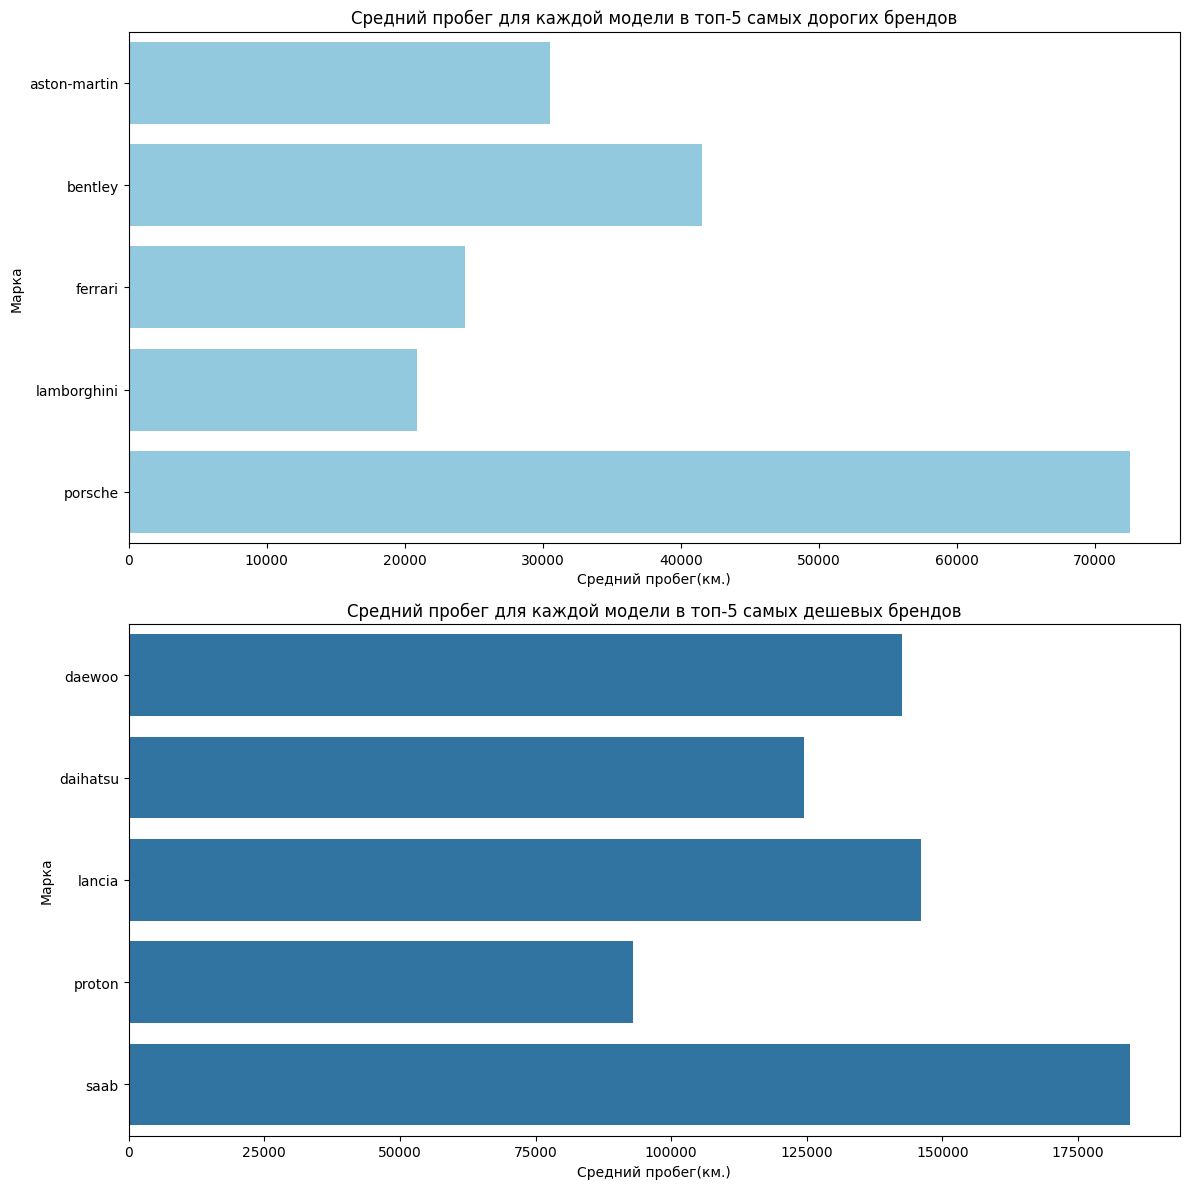

In [ ]:
# Рассмотрим, как различается средний пробег автомобилей в топ-5 самых дорогих автомобильных марок по сравнению с топ-5 наименее дорогими автомобильными марками:

# Определим топ-5 самых дорогих брендов и топ-5 самых дешевых на основе средней цены:
top_expensive_brands = df_no_outliers.groupby('brand')['price_in_euro'].mean().nlargest(5).index
bottom_expensive_brands = df_no_outliers.groupby('brand')['price_in_euro'].mean().nsmallest(5).index

# Отфильтруем топ-5 самых дорогих брендов:
df_top_expensive_brands = df_no_outliers[df_no_outliers['brand'].isin(top_expensive_brands)]

# Отфильтруем топ-5 самых дорогих брендов:
df_bottom_expensive_brands = df_no_outliers[df_no_outliers['brand'].isin(bottom_expensive_brands)]

# Отфильтруем данные по топ-5 самых дорогих брендов, рассчитаем средний пробег для каждой уникальной модели автомобиля из топ-5 самых дорогих брендов:
mean_mileage_top_brands = df_top_expensive_brands.groupby('brand')['mileage_in_km'].mean().reset_index()

# Отфильтруем данные по топ-5 самых дешевых брендов, рассчитаем средний пробег для каждой уникальной модели автомобиля из топ-5 самых дешевых брендов:
mean_mileage_bottom_brands = df_bottom_expensive_brands.groupby('brand')['mileage_in_km'].mean().reset_index()

# Создадим две  гистограммы (2 rows, 1 column):
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

sns.barplot(ax=axes[0], x='mileage_in_km', y='brand', data=mean_mileage_top_brands, color='skyblue')
axes[0].set_title('Средний пробег для каждой модели в топ-5 самых дорогих брендов')
axes[0].set_xlabel('Средний пробег(км.)')
axes[0].set_ylabel('Марка')

sns.barplot(ax=axes[1], x='mileage_in_km', y='brand', data=mean_mileage_bottom_brands)
axes[1].set_title('Средний пробег для каждой модели в топ-5 самых дешевых брендов')
axes[1].set_xlabel('Cредний пробег(км.)')
axes[1].set_ylabel('Марка')

plt.tight_layout()
plt.show()


In [ ]:
# Вывод по визуализации: В целом можно сказать, что у моделей топ-5 дешевых марок  средний пробег минимум 100 тыс. км. и более.
 А у моделей топ-5 дорогих марок - 30-40 тыс. км.
 Вероятнее всего, разница обусловлена разным уровнем дохода собственников авто и их образом жизни.
 И в той и в другой группе есть выбросы.
 Максимальный пробег (70 тыс. км.) среди топ-5 дорогих марок у Porshe - вероятно, в связи с тем, что модель пользуется популярностью среди любитеелй быстрой езды.
 В группе топ-5 самых дешевых марок - максимальный пробег у Saab.

Марка с максимальной широкой линейкой моделей -  volkswagen, и она включает 84 модели.


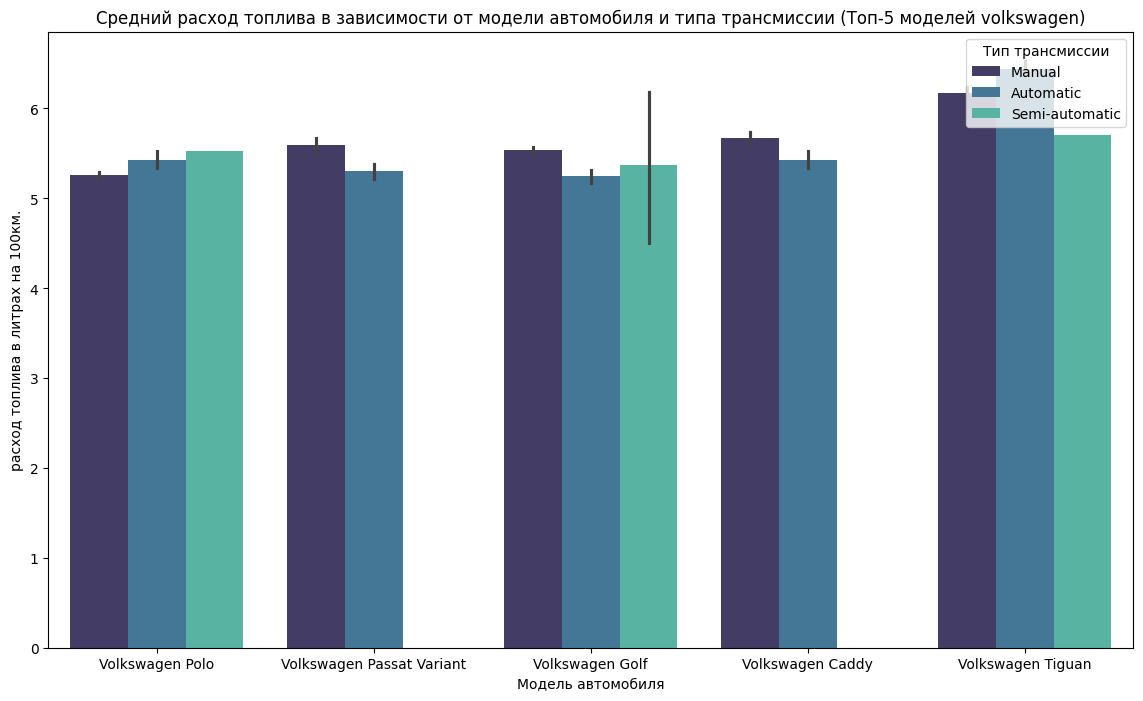

In [ ]:
# Найдем марку с максимальной линейкой моделей:
most_models_brand = df_no_outliers['brand'].value_counts().idxmax()

# Посчитаем количество моделей:
num_models = df_no_outliers[df_no_outliers['brand'] == most_models_brand]['model'].nunique()

# Выведем результат:
print(f"Марка с максимальной широкой линейкой моделей -  {most_models_brand}, и она включает {num_models} модели.")

#Какова разница в среднем расходе топлива для различных типов трансмиссий в топ-5 моделях марки с наибольшим количеством моделей?

# Найдем бренд с наибольшим количеством моделей:
most_models_brand = df_no_outliers['brand'].value_counts().idxmax()

# Выберем топ-5 моделей бренда с наибольшим количеством моделей:
top_5_models_of_most_brand = df_no_outliers[df_no_outliers['brand'] == most_models_brand]['model'].value_counts().nlargest(5).index.tolist()

# Отфильтруем данные по марке и модели:
filtered_df = df_no_outliers[(df_no_outliers['brand'] == most_models_brand) & (df_no_outliers['model'].isin(top_5_models_of_most_brand))]

# Визуализация: Сгруппированный график среднего расхода топлива по типу трансмиссии внутри брендов (Топ-5 моделей самых модельных брендов)
plt.figure(figsize=(14, 8))
sns.barplot(x='model', y='fuel_consumption_l_100km', hue='transmission_type', data=filtered_df, palette='mako')
plt.title(f'Средний расход топлива в зависимости от модели автомобиля и типа трансмиссии (Топ-5 моделей {most_models_brand})')
plt.xlabel('Модель автомобиля')
plt.ylabel('расход топлива в литрах на 100км.')
plt.legend(title='Тип трансмиссии', loc='upper right')
plt.show()

In [ ]:
# Вывод по визуализации: у топ-5 моделей Volkswagen примерно равное потребление топлива  около 5-5,5 л. на 100 км. при всех типах трансмиссии с незначительным перевесом ручной коробки.
# Однако, у модели Volkswagen Tiguan расход топлива в среднем 6 л. на 100 км., что больше, чем у других моделей в топ-5. Кроме полу-автоматической коробки. Здесь показатели расхода топлива также около 5,5 л. на 100 км.



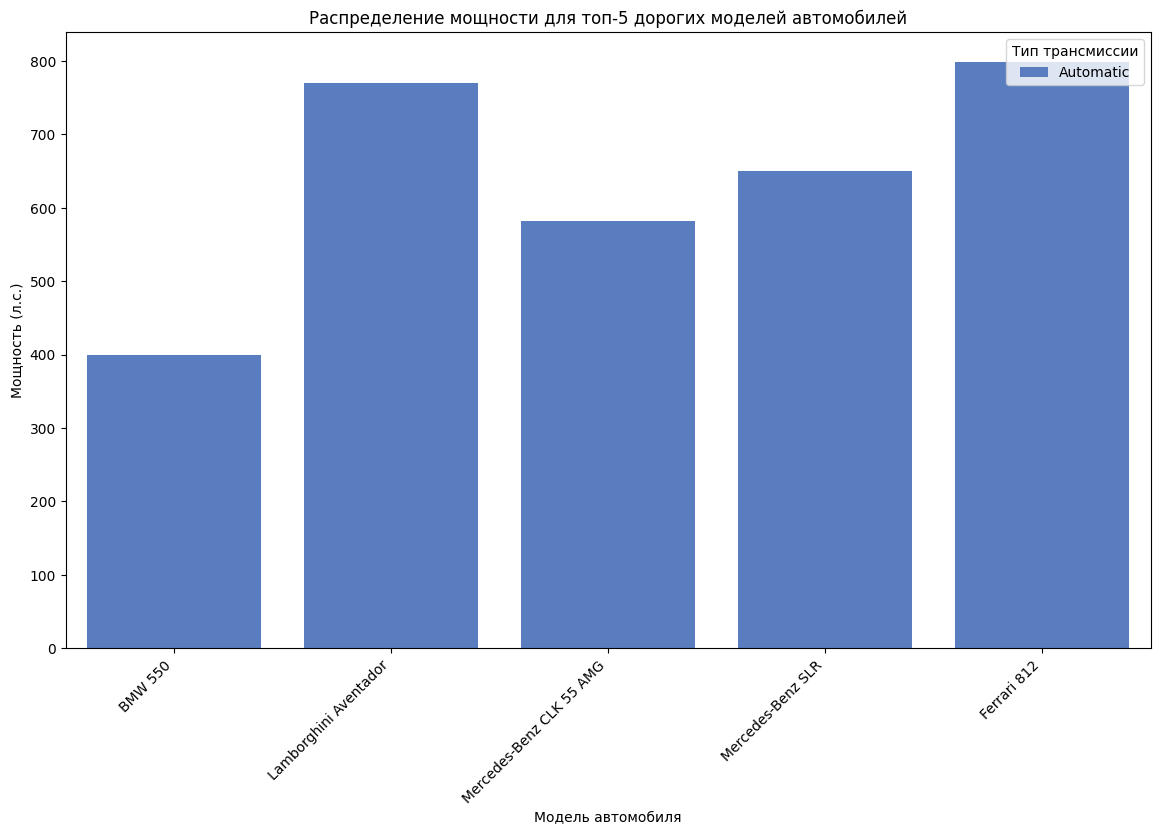

In [ ]:
#Как различается распределение мощности в зависимости от типа трансмиссии в топ-5 самых дорогих моделей автомобилей?

# Найдите топ-5 самых дорогих моделей автомобилей:
top_5_highest_priced_cars = df_no_outliers.nlargest(5, 'price_in_euro')

# Визуализация: Сгруппированный график мощности по типу трансмиссии для топ-5 самых дорогих моделей автомобилей:
plt.figure(figsize=(14, 8))
sns.barplot(x='model', y='power_ps', hue='transmission_type', data=top_5_highest_priced_cars, palette='muted', errorbar=None)
plt.title('Распределение мощности для топ-5 дорогих моделей автомобилей')
plt.xlabel('Модель автомобиля')
plt.ylabel('Мощность (л.с.)')
plt.legend(title='Тип трансмиссии', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Вывод по визуализации: Самая высокая мощность в топ-5 самых дорогих автомобилей при автоматической коробке передач у автомобиля Ferrari 812: 800 л.с., а самая низкая - у BMW 550: 400 л.с.
# Разница - в 2 раза.

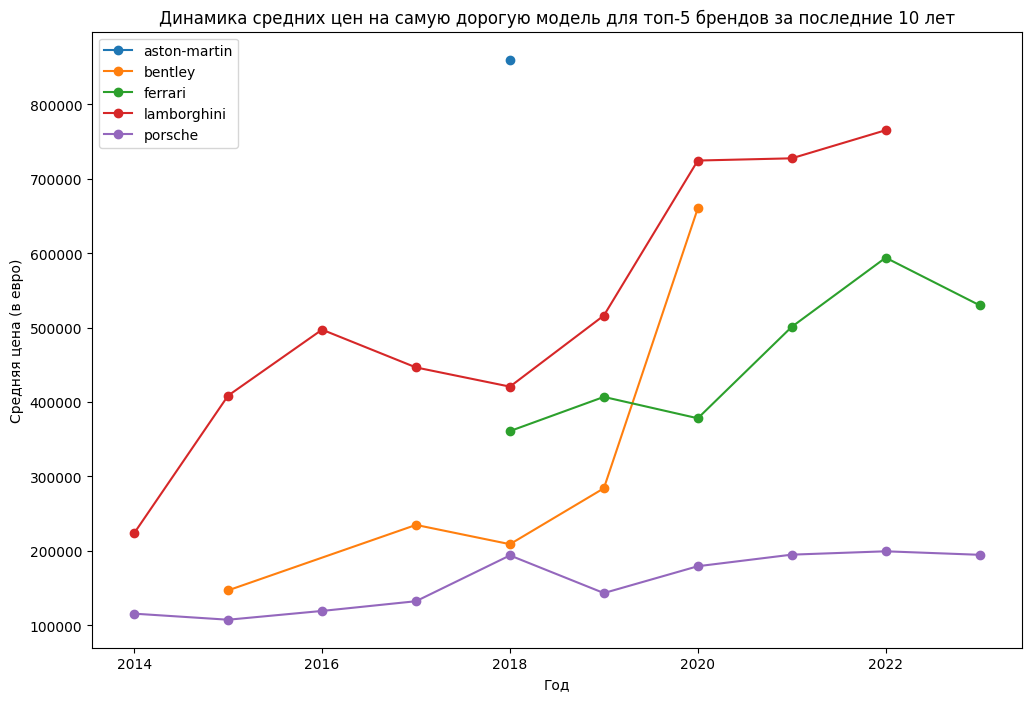

In [ ]:
#Как изменилась средняя цена самой дорогой модели для каждого бренда за последние 10 лет среди 5 ведущих брендов с самыми высокими средними ценами?

top_brands = df_no_outliers.groupby('brand')['price_in_euro'].mean().nlargest(5).index

# Отфильтруем датасет по годам и топ-5:
df_last_10_years = df_no_outliers[df_no_outliers['year'] >= (df_no_outliers['year'].max() - 9)]
df_top_brands = df_last_10_years[df_last_10_years['brand'].isin(top_brands)]

# Определим самую дорогую модель для каждого бренда
most_expensive_models = df_top_brands.loc[df_top_brands.groupby(['brand'])['price_in_euro'].idxmax()]

# Отфильтруем детефрейм для самых дорогих моделей
df_most_expensive = df_top_brands[df_top_brands.set_index(['brand', 'model']).index.isin(most_expensive_models.set_index(['brand', 'model']).index)]

# Визуализация
plt.figure(figsize=(12, 8))

# Сгруппируем данные по годам и маркам и рассчитаем среднюю цену:
grouped_data = df_most_expensive.groupby(['year', 'brand'])['price_in_euro'].mean()

# Построим график средних цен для каждого бренда:
for brand in df_most_expensive['brand'].unique():
    brand_data = grouped_data.xs(brand, level='brand')
    plt.plot(brand_data.index, brand_data.values, label=brand, marker='o')

plt.title('Динамика средних цен на самую дорогую модель для топ-5 брендов за последние 10 лет')
plt.xlabel('Год')
plt.ylabel('Средняя цена (в евро)')
plt.legend()
plt.show()

In [ ]:
Вывод по визуализации: В целом цены на все автомобили топ-5 выросли за последние 10 лет. Однако, если, например, на Porshe  цены поднимались постепенно.
То, по другим моделям динамика роста была более значительна. А, например, bently показал взрывной рост продаж к 2020г.
Возможно, это было связано с тем, что в 2020г. bently прекратил выпуск флагманской модели.
